
--- Evaluating: Total robbery [160] ---


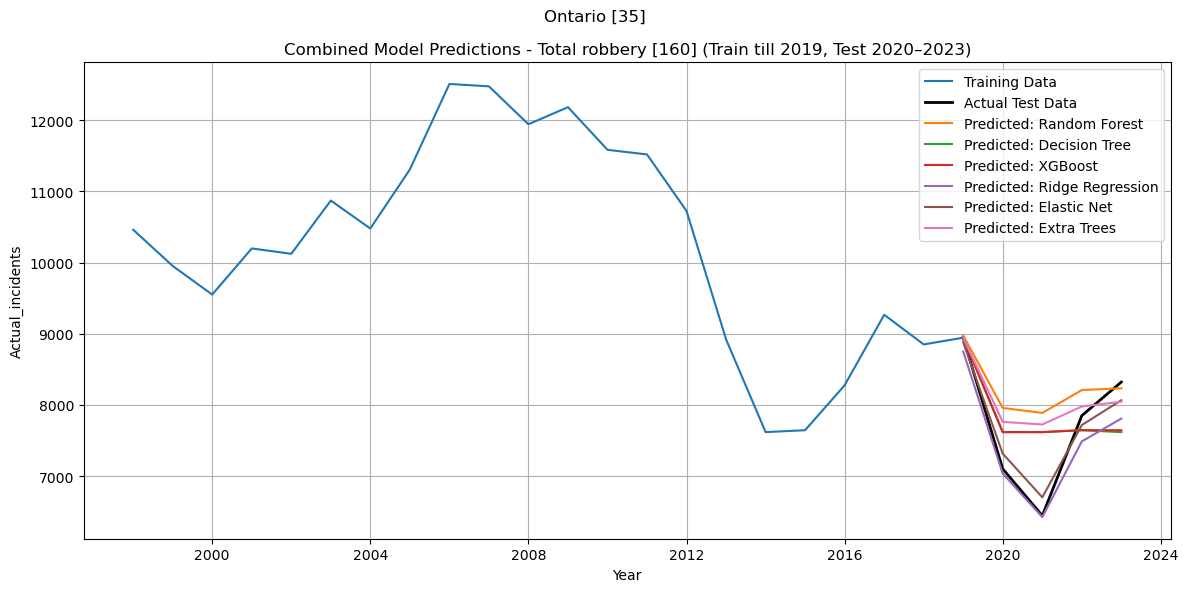


--- Evaluating: Total property crime violations [200] ---


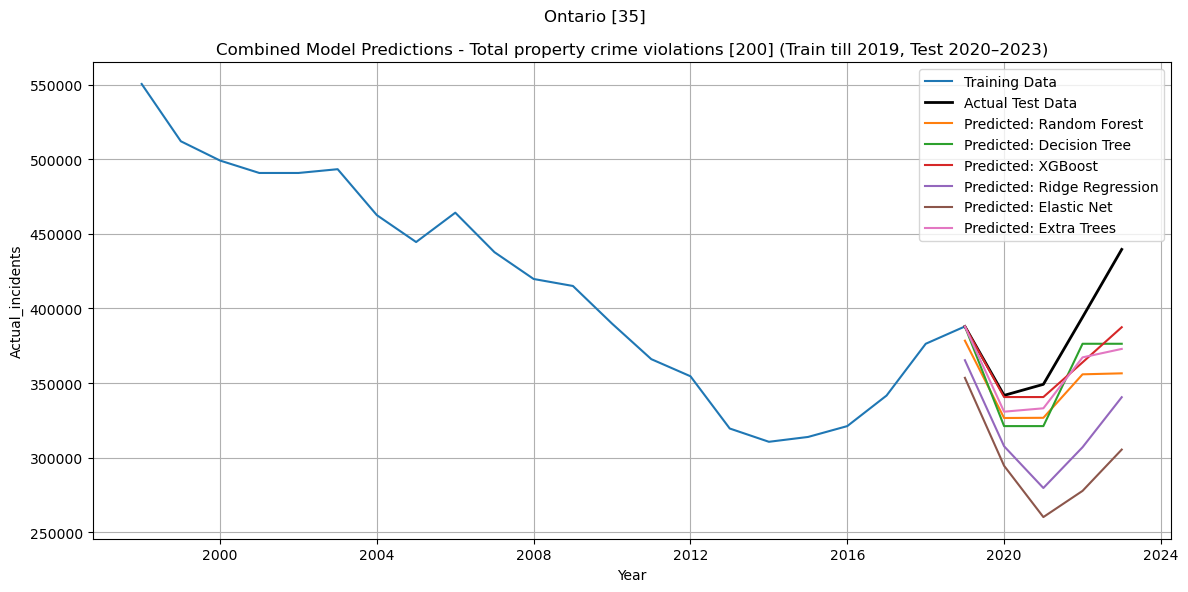


--- Evaluating: Total theft under $5,000 (non-motor vehicle) [240] ---


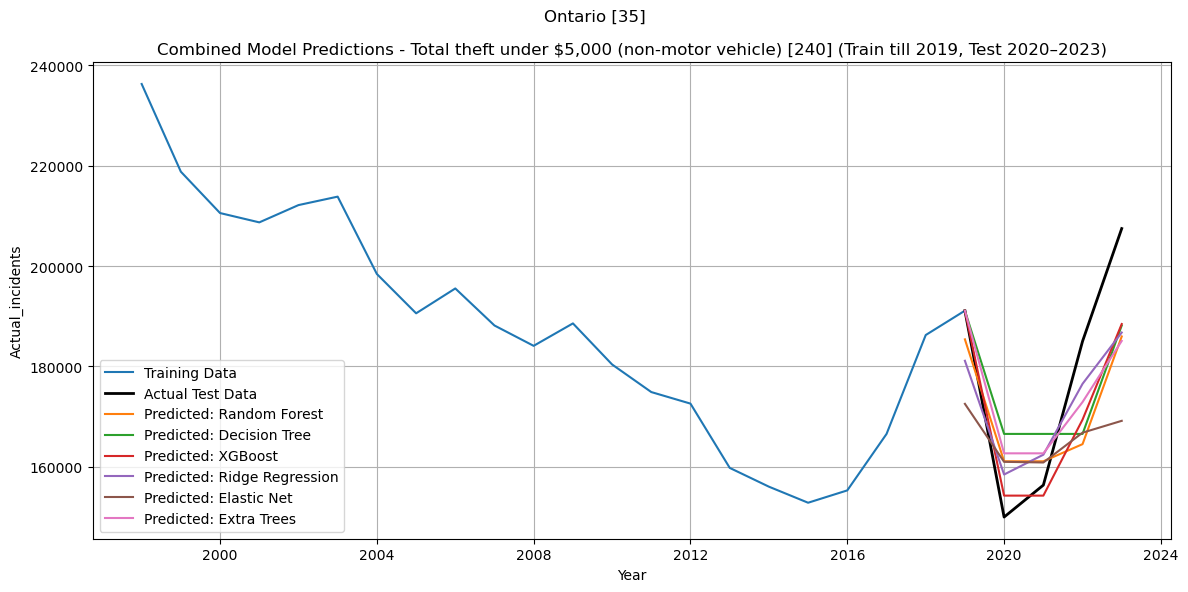


--- Evaluating: Total theft of motor vehicle [220] ---


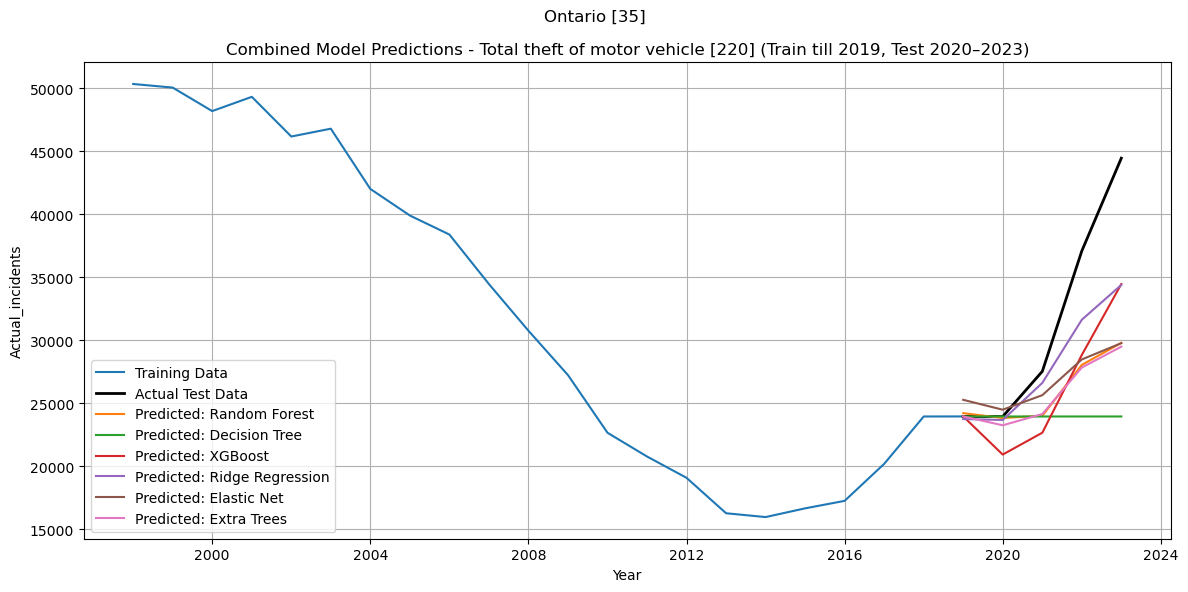


--- Evaluating: Total mischief [250] ---


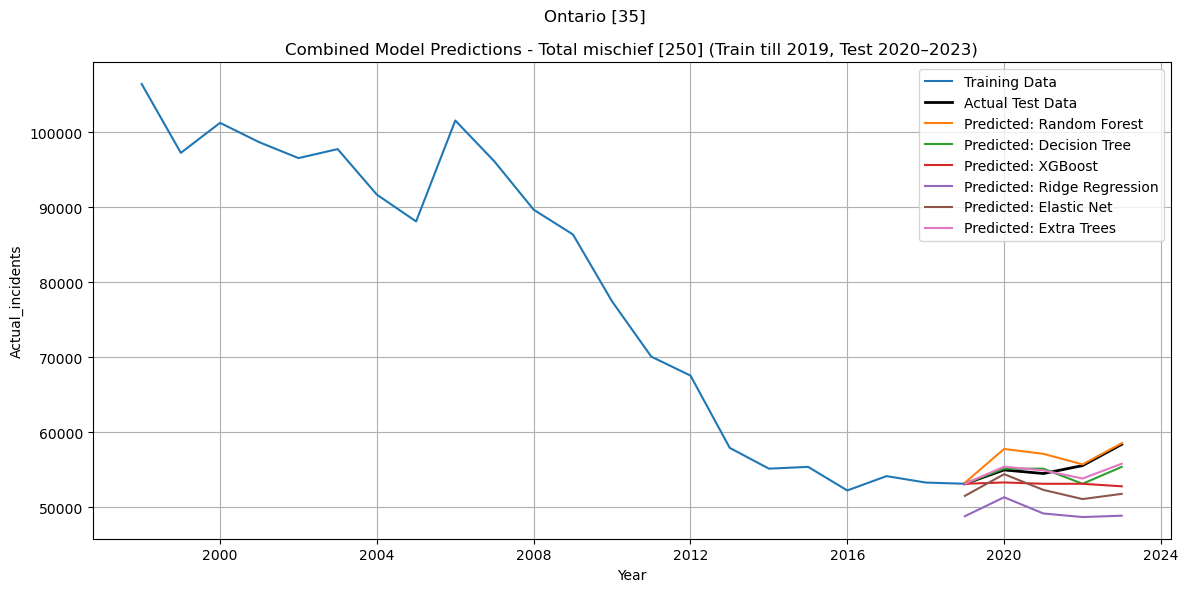


--- Evaluating: Total drug violations [401] ---


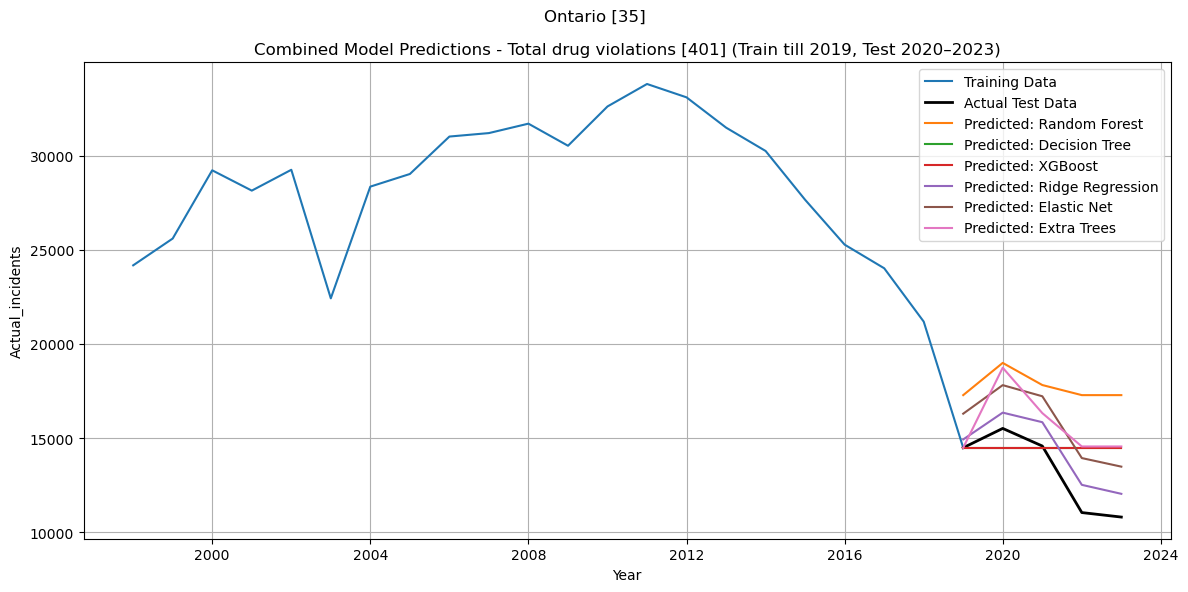


--- Evaluating: Sexual assault, level 3, aggravated [1310] ---


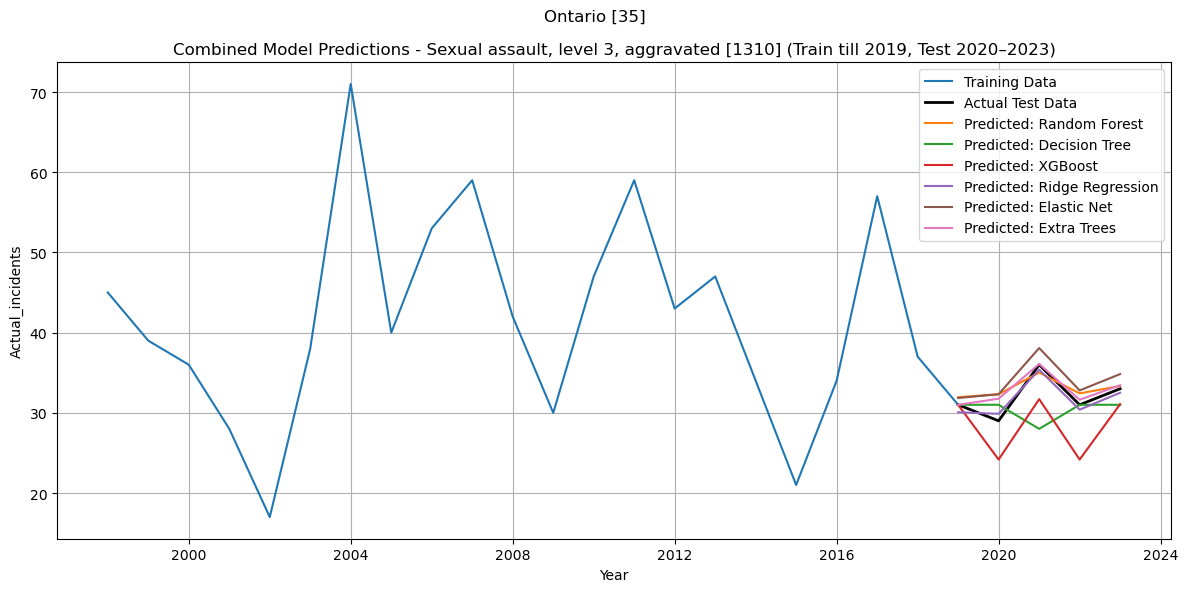


--- Evaluating: Abduction under age 14, by parent or guardian [1560] ---


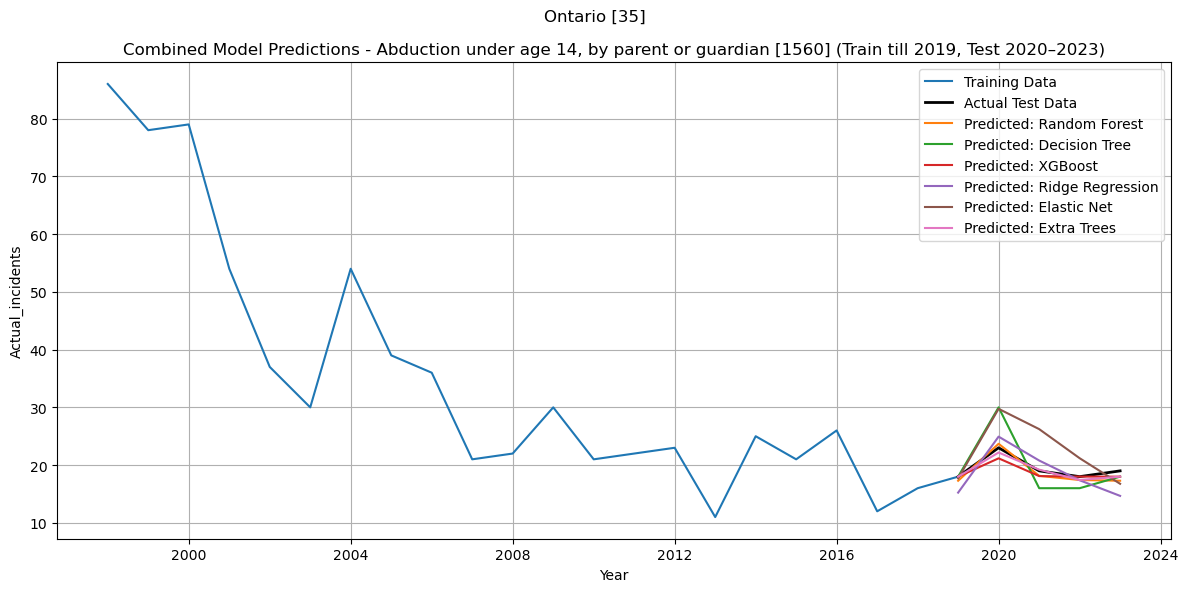


--- Evaluating: Criminal harassment [1625] ---


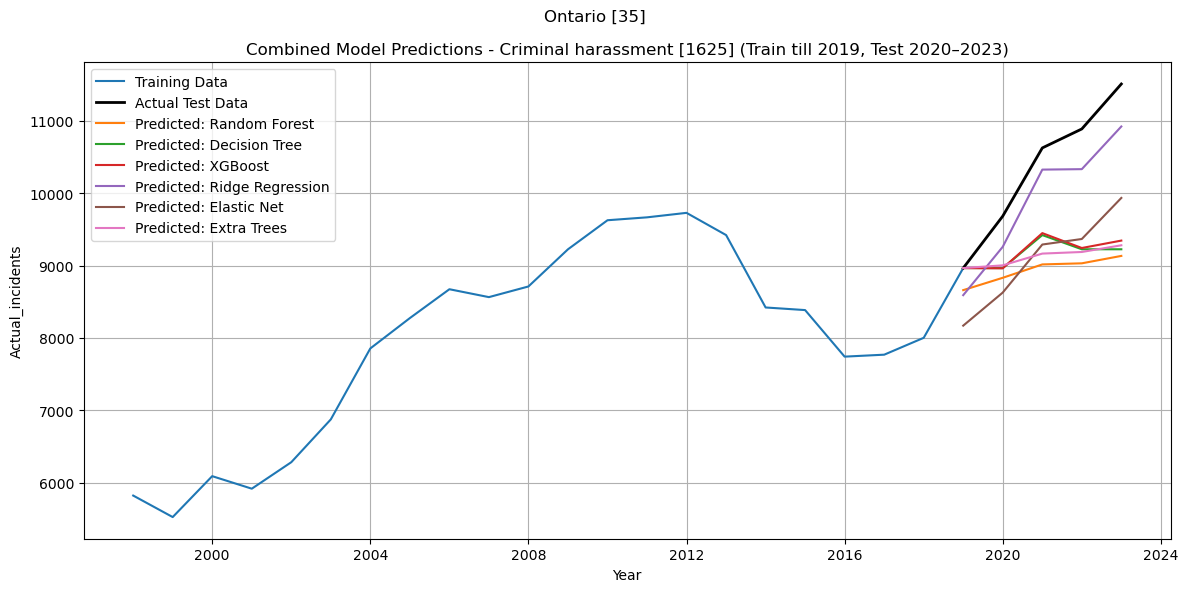

,Violation,Model,MAE,MSE,RMSE,R²,Accuracy (%)
0,Total robbery [160],Random Forest,555.74,5.914397e+05,769.05,0.240,92.81
1,Total robbery [160],Decision Tree,520.00,4.369044e+05,660.99,0.439,93.27
2,Total robbery [160],XGBoost,514.60,4.294532e+05,655.33,0.448,93.34
3,Total robbery [160],Ridge Regression,231.19,8.758187e+04,295.94,0.887,97.01
4,Total robbery [160],Elastic Net,185.52,4.008200e+04,200.20,0.949,97.60
5,Total robbery [160],Extra Trees,469.69,4.347282e+05,659.34,0.441,93.92
6,Total property crime violations [200],Random Forest,33684.63,1.837030e+09,42860.58,-0.483,91.19
7,Total property crime violations [200],Decision Tree,25924.60,1.104509e+09,33234.15,0.108,93.22
8,Total property crime violations [200],XGBoost,18410.59,7.416231e+08,27232.76,0.401,95.19
9,Total property crime violations [200],Ridge Regression,62468.57,4.780108e+09,69138.33,-2.859,83.67


In [1]:
# !pip install lightgbm
# !pip install xgboost
# !pip install matplotlib scikit-learn pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from IPython.display import display

# Load dataset
df = pd.read_csv("Merged_Unemployment_Data.csv")

# Convert date column to datetime
df['REF_DATE'] = pd.to_datetime(df['REF_DATE'], format='%Y')
df.set_index('REF_DATE', inplace=True)

violations = [
    'Total robbery [160]',
    'Total property crime violations [200]',
    'Total theft under $5,000 (non-motor vehicle) [240]',
    'Total theft of motor vehicle [220]',
    'Total mischief [250]',
    'Total drug violations [401]',
    # 'Murder, first degree [1110]',
    # 'Murder, second degree [1120]',
    "Sexual assault, level 3, aggravated [1310]",
    'Abduction under age 14, by parent or guardian [1560]',
    'Criminal harassment [1625]'
]

Place = 'Ontario [35]'

def plot_combined_predictions(X_train_scaled, y_train, X_test_scaled, y_test, title_suffix, place_name):
    models = {
        "Random Forest": RandomForestRegressor(),
        "Decision Tree": DecisionTreeRegressor(random_state=42),
        # "Neural Net (MLP)": MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000, random_state=42),
        "XGBoost": XGBRegressor(),
        # "LightGBM": LGBMRegressor(n_estimators=500, max_depth=7, learning_rate=0.05, num_leaves=31, min_child_samples=5),
        "Ridge Regression": Ridge(),
        "Elastic Net": ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42),
        "Extra Trees": ExtraTreesRegressor()
    }

    predictions = {}
    results = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train.values.ravel())
        y_pred = model.predict(X_test_scaled)
        predictions[name] = pd.Series(y_pred, index=y_test.index)

        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        accuracy = 100 - (mae / np.mean(y_test) * 100)

        results.append({
            "Violation": title_suffix.split(' (')[0],
            "Model": name,
            "MAE": round(mae, 2),
            "MSE": round(mse, 2),
            "RMSE": round(rmse, 2),
            "R²": round(r2, 3),
            "Accuracy (%)": round(accuracy, 2)
        })

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(y_train, label='Training Data')
    plt.plot(y_test, label='Actual Test Data', linewidth=2, color='black')
    for name, y_pred_series in predictions.items():
        plt.plot(y_pred_series, label=f'Predicted: {name}')

    plt.title(f'Combined Model Predictions - {title_suffix}')
    plt.suptitle(place_name)
    plt.xlabel('Year')
    plt.ylabel('Actual_incidents')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return results

# Run for all violations
all_results = []

for vio in violations:
    print(f"\n--- Evaluating: {vio} ---")

    filtered_df = df[(df['GEO'] == Place) & (df['Violations'] == vio)]
    y_full = filtered_df[['Actual_incidents']]
    X_full = filtered_df[[
        'Rate_per_100000_population',
        'Cleared_by_charge', 'Cleared_otherwise',
        'Percentage_contribution_to_the_Crime_Severity_Index_(CSI)',
        'Rate_adult_charged_per_100000_population_aged_18_years_and_over',
        'Rate_total_persons_charged_per_100000_population_aged_12_years_and_over',
        'Rate_youth_charged_per_100000_population_aged_12_to_17_years',
        'Total_cleared', 'Total_adult_charged', 'Total_persons_charged',
    ]]

    y_train = y_full['1998-01-01':'2019-12-31']
    y_test = y_full['2019-01-01':'2023-12-31']
    X_train = X_full['1998-01-01':'2019-12-31']
    X_test = X_full['2019-01-01':'2023-12-31']

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    results = plot_combined_predictions(X_train_scaled, y_train, X_test_scaled, y_test,
                                        f"{vio} (Train till 2019, Test 2020–2023)", Place)
    all_results.extend(results)

# Save and display results
df_results = pd.DataFrame(all_results)
df_results = df_results[['Violation', 'Model', 'MAE', 'MSE', 'RMSE', 'R²', 'Accuracy (%)']]
display(df_results)
df_results.to_csv("model_evaluation_summary_with_10_features.csv", index=False)
